**Import the libraries and dataset as follows:**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# We'll be using the Iris Plants database
from sklearn.datasets import load_iris

SEED = 2017

**First, subset the imported data as shown:**

In [0]:
# The first 2 classes Iris-Setosa and Iris-Versicolour are
# linearly separable

iris = load_iris()
idxs = np.where(iris.target < 2)

X = iris.data[idxs]
y = iris.target[idxs]

**Plotting the data for two of the four variables with the following code snippet:**

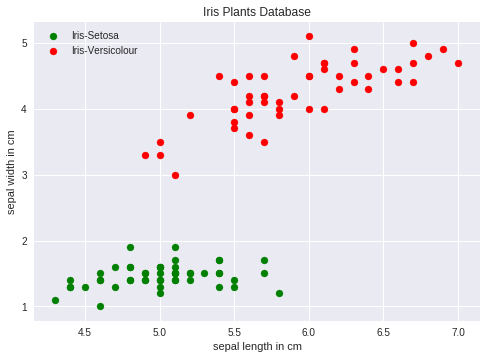

In [3]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 2], color = 'green',
            label = 'Iris-Setosa')
plt.scatter(X[y==1][:, 0], X[y==1][:, 2], color = 'red',
            label = 'Iris-Versicolour')

plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

**To validate our results, we split the data into training & validation sets as follows:**

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = SEED)

**Initializing the weights and the bias for the perceptron:**

In [0]:
weights = np.random.normal(size = X_train.shape[1])

bias = 1

**Before training, we need to define the hyperparameters:**

In [0]:
learning_rate = 0.1

n_epochs = 15

**Now, we can start training our perceptron with a for loop:**

In [0]:
del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

for i in range(n_epochs):
  # We apply a simple step function, if the output is > 0.5, we
  # predict 1 and 0 otherwise
  output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)
  
  # Compute MSE
  error = np.mean((y_train - output) ** 2)
  
  # Update weights and bias
  weights -= learning_rate * np.dot((output - y_train), X_train)
  bias += learning_rate * np.sum(np.dot((output - y_train), X_train))
  
  # Calculate MSE
  loss = np.mean((output - y_train) ** 2)
  hist_loss.append(loss)
  
  # Determine validation accuracy
  output_val = np.where(X_val.dot(weights) > 0.5, 1, 0)
  accuracy = np.mean(np.where(y_val == output_val, 1, 0))
  hist_accuracy.append(accuracy)

**Plotting the saved training loss and validation accuracy:**

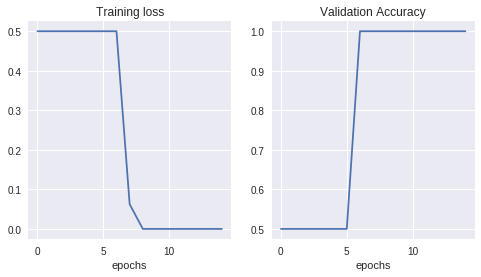

In [8]:
fig = plt.figure(figsize = (8, 4))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Training loss')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Validation Accuracy')
plt.show()